### Coefficient distributions from the final selected landscapes

In [1]:
from common import load_landscapes, set_matplotlib_latex, plot_colours
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
set_matplotlib_latex()
import scipy

In [3]:
kde_factor_scalar = 0.7
all_landscapes = load_landscapes(f"../landscapes/landscape_trios_20.json")

all_coefficients_low = [[] for _ in range(8)]
all_coefficients_high = [[] for _ in range(4)]
coefficients_low_block = []
coefficients_low_no_block = []
for landscape in all_landscapes:
    landscape_coefficients_low = landscape.get_coefficients_low()
    landscape_coefficients_high = landscape.get_coefficients_high()
    for i in range(8):
        all_coefficients_low[i].append(landscape_coefficients_low[i])
        block_nr1 = landscape.get_block_nr1()
        block_nr2 = landscape.get_block_nr2()
        if i in [2 * block_nr1, 2 * block_nr1 + 1, 2 * block_nr2, 2 * block_nr2 + 1]:
            coefficients_low_block.append(landscape_coefficients_low[i])
        else:
            coefficients_low_no_block.append(landscape_coefficients_low[i])
    for i in range(4):
        all_coefficients_high[i].append(landscape_coefficients_high[i])

#### Distribution of the low-level coefficients

Low-level coefficient 0
mean: 0.000508815956424613
std: 0.5902323723489937

Low-level coefficient 1
mean: 0.06084266788197567
std: 0.5487833772669231

Low-level coefficient 2
mean: 0.12229351090246357
std: 0.507184000523351

Low-level coefficient 3
mean: -0.04018873987340061
std: 0.5450181058440469

Low-level coefficient 4
mean: -0.008374624683538815
std: 0.5275803581950619

Low-level coefficient 5
mean: -0.029730384913712115
std: 0.5291038521572632

Low-level coefficient 6
mean: -0.0987878912568754
std: 0.5427520461365143

Low-level coefficient 7
mean: -0.10107998303838857
std: 0.5424227819268869



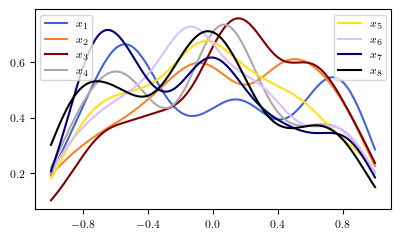

In [4]:
%matplotlib inline

plt.figure(figsize = (4.6, 2.6))
low_coefficients_range = np.linspace(-1, 1, 200)
plot_labels = [r"$x_{" + f"{i + 1}" + r"}$" for i in range(8)]
for i in range(len(all_coefficients_low)):
    print(f"Low-level coefficient {i}")
    print(f"mean: {np.mean(all_coefficients_low[i])}")
    print(f"std: {np.std(all_coefficients_low[i], ddof=1)}")
    print()
    kde = scipy.stats.gaussian_kde(all_coefficients_low[i])
    kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
    plt.plot(low_coefficients_range, kde(low_coefficients_range), color=plot_colours["distinctColours"][i])
plt.gca().yaxis.set_major_locator(MaxNLocator(4))
plt.gca().xaxis.set_major_locator(MaxNLocator(6))
lines = plt.gca().get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1, 2, 3]], plot_labels[:4], loc="upper left")
legend2 = plt.legend([lines[i] for i in [4, 5, 6, 7]], plot_labels[4:], loc="upper right")
plt.gca().add_artist(legend1)
plt.savefig(f"../figures/coefficient_statistics/low_level_coefficients_distribution.pdf", bbox_inches="tight")
plt.show()

#### Distribution of the high-level coefficients

High-level coefficient 0
mean: -0.01769651100323589
std: 0.7367401104404928

High-level coefficient 1
mean: 0.013716436881126455
std: 0.7906221441685771

High-level coefficient 2
mean: 0.06468143138816392
std: 0.7955438588171745

High-level coefficient 3
mean: 0.005033995721708274
std: 0.7663314758287104



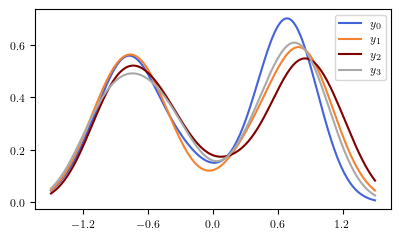

In [5]:
%matplotlib inline

plt.figure(figsize = (4.6, 2.6))
high_coefficients_range = np.linspace(-1.5, 1.5, 200)
for i in range(len(all_coefficients_high)):
    print(f"High-level coefficient {i}")
    print(f"mean: {np.mean(all_coefficients_high[i])}")
    print(f"std: {np.std(all_coefficients_high[i], ddof=1)}")
    print()
    kde = scipy.stats.gaussian_kde(all_coefficients_high[i])
    kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
    plt.plot(high_coefficients_range, kde(high_coefficients_range), label=r"$y_{" + f"{i}" + r"}$", color=plot_colours["distinctColours"][i])
plt.gca().yaxis.set_major_locator(MaxNLocator(4))
plt.gca().xaxis.set_major_locator(MaxNLocator(6))
plt.legend()
plt.savefig(f"../figures/coefficient_statistics/high_level_coefficients_distribution.pdf", bbox_inches="tight")
plt.show()

#### Distribution of the low-level coefficients vs. high-level coefficients

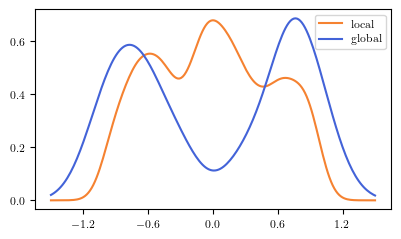

In [6]:
%matplotlib inline

plt.figure(figsize = (4.6, 2.6))

kde = scipy.stats.gaussian_kde([coefficient for coefficients in all_coefficients_low for coefficient in coefficients])
kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
plt.plot(high_coefficients_range, kde(high_coefficients_range), color=plot_colours["local"], label="local")
kde = scipy.stats.gaussian_kde([coefficient for coefficients in all_coefficients_high for coefficient in coefficients])
kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
plt.plot(high_coefficients_range, kde(high_coefficients_range), color=plot_colours["global"], label="global")
plt.gca().yaxis.set_major_locator(MaxNLocator(4))
plt.gca().xaxis.set_major_locator(MaxNLocator(6))
plt.legend()
plt.savefig(f"../figures/coefficient_statistics/low_high_level_coefficients_distribution.pdf", bbox_inches="tight")
plt.show()

#### Distribution of the low-level coefficients within and without the local suggestions
Distinguishes low-level coefficients based on whether they are in the blocks that the local AI refers to.

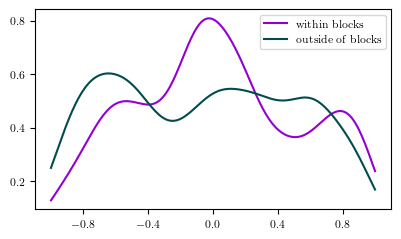

In [7]:
%matplotlib inline

plt.figure(figsize = (4.6, 2.6))

kde = scipy.stats.gaussian_kde(coefficients_low_block)
kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
plt.plot(low_coefficients_range, kde(low_coefficients_range), color=plot_colours["ai"], label="within blocks")
kde = scipy.stats.gaussian_kde(coefficients_low_no_block)
kde.set_bandwidth(bw_method=kde.factor * kde_factor_scalar)
plt.plot(low_coefficients_range, kde(low_coefficients_range), color=plot_colours["participant"], label="outside of blocks")
plt.gca().yaxis.set_major_locator(MaxNLocator(4))
plt.gca().xaxis.set_major_locator(MaxNLocator(6))
plt.legend()
plt.savefig(f"../figures/coefficient_statistics/block_no_block_coefficients_distribution.pdf", bbox_inches="tight")
plt.show()